In [80]:
import matplotlib.pyplot
import pandas as pd
df = pd.read_csv("/home/austin/delta_debugging_reports.csv")
df

,wala,dacapo-2006,campaign0,CDG+HDD,reflectionSetting/STRING_ONLY/MST/NONE/NONE/MPT/STRING_ONLY,antlr.jar,38186,15129,60.38076782066726,2307,19327,21701
0,wala,dacapo-2006,campaign0,CDG+HDD,reflectionSetting/STRING_ONLY/MST/NONE/NONE/MP...,hsqldb.jar,65487,818,98.750897,7361,14244,21782
1,wala,dacapo-2006,campaign0,CDG+HDD,reflectionSetting/STRING_ONLY/MST/NONE/NONE/MP...,pmd.jar,48170,27286,43.354785,13862,7836,21867
2,wala,dacapo-2006,campaign0,CDG+HDD,reflectionSetting/NO_FLOW_TO_CASTS/MST/STRING_...,pmd.jar,48170,39074,18.883122,21620,0,21752
3,wala,dacapo-2006,campaign0,CDG+HDD,reflectionSetting/NO_FLOW_TO_CASTS/MST/NO_FLOW...,pmd.jar,48170,27240,43.450280,5271,16373,21709
4,wala,dacapo-2006,campaign0,CDG+HDD,reflectionSetting/NO_FLOW_TO_CASTS/MST/NO_FLOW...,pmd.jar,48170,39074,18.883122,21622,0,21791
...,...,...,...,...,...,...,...,...,...,...,...,...
215,flowdroid,droidbench,campaign0,HDD_ONLY,callbackanalyzer/FAST/MST/DEFAULT,RegisterGlobal1.apk,106,58,45.283019,0,388,393
216,flowdroid,droidbench,campaign0,HDD_ONLY,callbackanalyzer/FAST/MST/DEFAULT,NativeIDFunction.apk,82,74,9.756098,0,529,541
217,flowdroid,droidbench,campaign0,HDD_ONLY,callbackanalyzer/FAST/MST/DEFAULT,Button2.apk,90,76,15.555556,0,338,419
218,flowdroid,droidbench,campaign0,HDD_ONLY,callbackanalyzer/FAST/MST/DEFAULT,RegisterGlobal2.apk,59,43,27.118644,0,355,363


In [81]:
df = df.set_axis(['tool', 'benchmark', 'campaign', 'configuration', 'partial_order', 'program', 'start_lines', 'end_lines', 'percent_reduction', 'binary_timer', 'hdd_timer', 'program_timer'], axis=1)
df = df[~(df['program'].str.contains('eclipse'))]

In [82]:
df['full'] = df.tool + df.benchmark + df.campaign + df.partial_order + df.program
df['lines_reduced'] = df.start_lines - df.end_lines
pvt = df.pivot_table(index='full', columns='configuration', values='percent_reduction').reset_index()
pvt

configuration,full,CDG+HDD,HDD_ONLY
0,flowdroiddroidbenchcampaign0aliasflowins/FALSE...,3.333333,3.333333
1,flowdroiddroidbenchcampaign0aliasflowins/TRUE/...,6.666667,6.666667
2,flowdroiddroidbenchcampaign0aliasflowins/TRUE/...,41.538462,41.538462
3,flowdroiddroidbenchcampaign0aliasflowins/TRUE/...,20.689655,20.689655
4,flowdroiddroidbenchcampaign0analyzeframeworks/...,11.538462,11.538462
...,...,...,...
110,waladacapo-2006campaign0reflectionSetting/NO_F...,18.883122,9.956404
111,waladacapo-2006campaign0reflectionSetting/NO_F...,18.883122,8.328835
112,waladacapo-2006campaign0reflectionSetting/STRI...,NaN,11.231865
113,waladacapo-2006campaign0reflectionSetting/STRI...,98.750897,0.609281


In [83]:

pvt = df[(df.benchmark == 'dacapo-2006') | (df.benchmark == 'fossdroid')].pivot_table(index='full', columns='configuration', values='percent_reduction').reset_index()

In [84]:
pvt2 = pvt[(pvt['HDD_ONLY'].isna()) | (pvt['CDG+HDD'].isna())]
pvt2

configuration,full,CDG+HDD,HDD_ONLY
2,sootdacapo-2006campaign0empties-as-allocs/true...,NaN,0.537197
3,sootdacapo-2006campaign0empties-as-allocs/true...,99.728190,NaN
10,sootdacapo-2006campaign0safe-newinstance/true/...,41.712952,NaN
12,sootdacapo-2006campaign0simplify-offline/false...,NaN,0.216337
14,sootdacapo-2006campaign0simulate-natives/true/...,90.682120,NaN
25,waladacapo-2006campaign0reflectionSetting/STRI...,NaN,11.231865


In [85]:
pvt = pvt[~(pvt['CDG+HDD'].isna()) & ~(pvt['HDD_ONLY'].isna())]
pvt = pd.melt(pvt, id_vars='full', value_vars=['CDG+HDD', 'HDD_ONLY'])
a = 4

KeyboardInterrupt: 

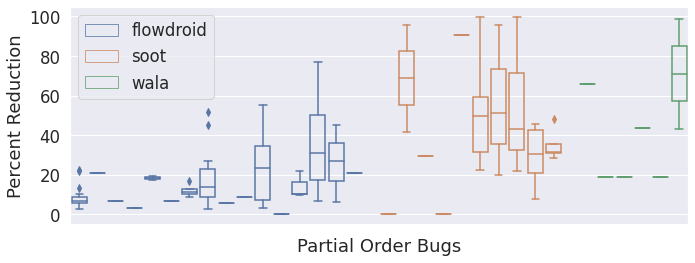

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
plt.close("all")
fig, ax = plt.subplots(1,1, figsize=(10,4))
(debug := df[df['configuration'] == 'CDG+HDD'].sort_values('tool'))
sns.boxplot(ax=ax, x='partial_order', y='percent_reduction', hue='tool', data=debug, width=2.5)

box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliersaxs[0].set_xticklabels('')
ax.set_xticklabels('')
ax.margins(x=0.01)
ax.set_xlabel('Partial Order Bugs')
ax.set_ylabel('Percent Reduction')

ax.legend(loc='upper left')
for legpatch in ax.legend_.get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')
fig.tight_layout()
plt.show()
fig.savefig("/home/austin/git/ECSTATIC_paper/figs/delta_boxplot.pdf", format='pdf')

6.9535013253784905
99.9557164017286


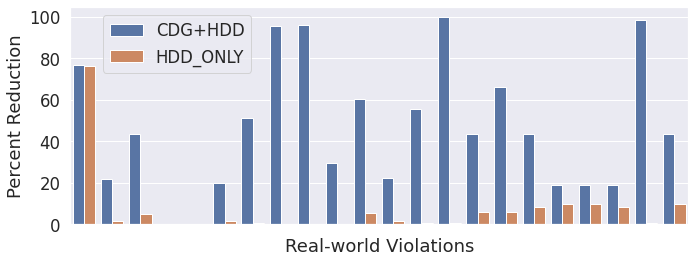

In [92]:
plt.close("all")
fig, ax = plt.subplots(1,1, figsize=(10,4))
pvt = df[(df.benchmark == 'dacapo-2006') | (df.benchmark == 'fossdroid')].pivot_table(index='full',
                                                                                      columns='configuration',
                                                                                      values='percent_reduction').reset_index()
pvt = pvt[~(pvt['CDG+HDD'].isna()) & ~(pvt['HDD_ONLY'].isna())]
print(pvt['HDD_ONLY'].mean())
print(pvt['CDG+HDD'].max())
pvt = pd.melt(pvt, id_vars='full', value_vars=['CDG+HDD', 'HDD_ONLY'])
sns.barplot(ax=ax, x='full', y='value', hue='configuration', data=pvt)
ax.set_xticklabels('')
ax.set_xlabel('Real-world Violations')
ax.set_ylabel('Percent Reduction')
ax.legend(loc='upper left', bbox_to_anchor=(0.04, 1))

fig.tight_layout()
plt.show()
fig.savefig("/home/austin/git/ECSTATIC_paper/figs/cdg_hdd_comparison.pdf", format='pdf')

In [71]:
print(f"Average CDG+HDD reduction is {df[df['configuration']=='CDG+HDD']['lines_reduced'].mean()}")
print(f"Average HDD reduction is {df[df['configuration'] == 'HDD_ONLY']['lines_reduced'].mean()}")

dft = df[(df.benchmark == 'dacapo-2006') | (df.benchmark == 'fossdroid')]
print(f"Average CDG+HDD reduction for real world is {dft[(dft['configuration']=='CDG+HDD')]['lines_reduced'].mean()}")
print(f"Average HDD reduction is {dft[dft['configuration'] == 'HDD_ONLY']['lines_reduced'].mean()}")

Average CDG+HDD reduction is 6793.828571428571
Average HDD reduction is 405.9252336448598
Average CDG+HDD reduction for real world is 28500.76
Average HDD reduction is 1705.08


In [72]:
dft = df[(df['configuration'] == 'CDG+HDD') & ((df['benchmark'] == 'cats-microbenchmark') | (df['benchmark'] == 'droidbench'))]

print(dft[dft['program_timer'] < 6*60*60].program_timer.mean())
print(dft[dft['program_timer'] < 6*60*60].program_timer.max())

950.6375
3433
